In [4]:
import pandas as pd

df_train = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/cmi-detect-behavior-with-sensor-data/train.csv')
df_train_demographics = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/cmi-detect-behavior-with-sensor-data/train_demographics.csv')
df_test = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/cmi-detect-behavior-with-sensor-data/test.csv')
df_test_demographics = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/cmi-detect-behavior-with-sensor-data/test_demographics.csv')
df_merged_train  = pd.merge(df_train, df_train_demographics, on='subject', how='left')
df_merged_test  = pd.merge(df_test, df_test_demographics, on='subject', how='left')

In [5]:
df_merged_train.columns.to_list()

['row_id',
 'sequence_type',
 'sequence_id',
 'sequence_counter',
 'subject',
 'orientation',
 'behavior',
 'phase',
 'gesture',
 'acc_x',
 'acc_y',
 'acc_z',
 'rot_w',
 'rot_x',
 'rot_y',
 'rot_z',
 'thm_1',
 'thm_2',
 'thm_3',
 'thm_4',
 'thm_5',
 'tof_1_v0',
 'tof_1_v1',
 'tof_1_v2',
 'tof_1_v3',
 'tof_1_v4',
 'tof_1_v5',
 'tof_1_v6',
 'tof_1_v7',
 'tof_1_v8',
 'tof_1_v9',
 'tof_1_v10',
 'tof_1_v11',
 'tof_1_v12',
 'tof_1_v13',
 'tof_1_v14',
 'tof_1_v15',
 'tof_1_v16',
 'tof_1_v17',
 'tof_1_v18',
 'tof_1_v19',
 'tof_1_v20',
 'tof_1_v21',
 'tof_1_v22',
 'tof_1_v23',
 'tof_1_v24',
 'tof_1_v25',
 'tof_1_v26',
 'tof_1_v27',
 'tof_1_v28',
 'tof_1_v29',
 'tof_1_v30',
 'tof_1_v31',
 'tof_1_v32',
 'tof_1_v33',
 'tof_1_v34',
 'tof_1_v35',
 'tof_1_v36',
 'tof_1_v37',
 'tof_1_v38',
 'tof_1_v39',
 'tof_1_v40',
 'tof_1_v41',
 'tof_1_v42',
 'tof_1_v43',
 'tof_1_v44',
 'tof_1_v45',
 'tof_1_v46',
 'tof_1_v47',
 'tof_1_v48',
 'tof_1_v49',
 'tof_1_v50',
 'tof_1_v51',
 'tof_1_v52',
 'tof_1_v53',
 'tof

In [6]:
df_merged_train['gesture'].value_counts()


gesture
Text on phone                                 58462
Neck - scratch                                56619
Eyebrow - pull hair                           44305
Forehead - scratch                            40923
Forehead - pull hairline                      40802
Above ear - pull hair                         40560
Neck - pinch skin                             40507
Eyelash - pull hair                           40218
Cheek - pinch skin                            40124
Wave hello                                    34356
Write name in air                             31267
Pull air toward your face                     30743
Feel around in tray and pull out an object    17114
Glasses on/off                                13542
Drink from bottle/cup                         13093
Scratch knee/leg skin                         12328
Write name on leg                             10138
Pinch knee/leg skin                            9844
Name: count, dtype: int64

In [7]:
BFRB = [
    'Above ear - pull hair',
    'Forehead - pull hairline',
    'Forehead - scratch',
    'Eyebrow - pull hair',
    'Eyelash - pull hair',
    'Neck - pinch skin',
    'Neck - scratch',
    'Cheek - pinch skin'
]
# total count of values in df_merged_train['gesture']
print("Value counts:\n", df_merged_train['gesture'].value_counts())

# count where gesture is in BFRB
count_in_BFRB = df_merged_train['gesture'].isin(BFRB).sum()
print("\nRows in BFRB:", count_in_BFRB)

# count where gesture is NOT in BFRB
count_not_in_BFRB = (~df_merged_train['gesture'].isin(BFRB)).sum()
print("Rows NOT in BFRB:", count_not_in_BFRB)

# sanity check: should equal total row count
print("\nTotal rows:", len(df_merged_train))
print("Check:", count_in_BFRB + count_not_in_BFRB == len(df_merged_train))



Value counts:
 gesture
Text on phone                                 58462
Neck - scratch                                56619
Eyebrow - pull hair                           44305
Forehead - scratch                            40923
Forehead - pull hairline                      40802
Above ear - pull hair                         40560
Neck - pinch skin                             40507
Eyelash - pull hair                           40218
Cheek - pinch skin                            40124
Wave hello                                    34356
Write name in air                             31267
Pull air toward your face                     30743
Feel around in tray and pull out an object    17114
Glasses on/off                                13542
Drink from bottle/cup                         13093
Scratch knee/leg skin                         12328
Write name on leg                             10138
Pinch knee/leg skin                            9844
Name: count, dtype: int64

Rows in BFRB: 

In [8]:
for g in BFRB:
    df_merged_train[g] = (df_merged_train['gesture'] == g).astype(int)

df_merged_train.head()


,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,shoulder_to_wrist_cm,elbow_to_wrist_cm,Above ear - pull hair,Forehead - pull hairline,Forehead - scratch,Eyebrow - pull hair,Eyelash - pull hair,Neck - pinch skin,Neck - scratch,Cheek - pinch skin
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,52,24.0,0,0,0,0,0,0,0,1
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,52,24.0,0,0,0,0,0,0,0,1
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,52,24.0,0,0,0,0,0,0,0,1
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,52,24.0,0,0,0,0,0,0,0,1
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,52,24.0,0,0,0,0,0,0,0,1


In [9]:
df_merged_train["Non-Target"] = (
    df_merged_train["sequence_type"]
    .astype(str)
    .str.strip()
    .str.title()
    .map({"Target": 0, "Non-Target": 1})
)

df_merged_train.columns.to_list()

['row_id',
 'sequence_type',
 'sequence_id',
 'sequence_counter',
 'subject',
 'orientation',
 'behavior',
 'phase',
 'gesture',
 'acc_x',
 'acc_y',
 'acc_z',
 'rot_w',
 'rot_x',
 'rot_y',
 'rot_z',
 'thm_1',
 'thm_2',
 'thm_3',
 'thm_4',
 'thm_5',
 'tof_1_v0',
 'tof_1_v1',
 'tof_1_v2',
 'tof_1_v3',
 'tof_1_v4',
 'tof_1_v5',
 'tof_1_v6',
 'tof_1_v7',
 'tof_1_v8',
 'tof_1_v9',
 'tof_1_v10',
 'tof_1_v11',
 'tof_1_v12',
 'tof_1_v13',
 'tof_1_v14',
 'tof_1_v15',
 'tof_1_v16',
 'tof_1_v17',
 'tof_1_v18',
 'tof_1_v19',
 'tof_1_v20',
 'tof_1_v21',
 'tof_1_v22',
 'tof_1_v23',
 'tof_1_v24',
 'tof_1_v25',
 'tof_1_v26',
 'tof_1_v27',
 'tof_1_v28',
 'tof_1_v29',
 'tof_1_v30',
 'tof_1_v31',
 'tof_1_v32',
 'tof_1_v33',
 'tof_1_v34',
 'tof_1_v35',
 'tof_1_v36',
 'tof_1_v37',
 'tof_1_v38',
 'tof_1_v39',
 'tof_1_v40',
 'tof_1_v41',
 'tof_1_v42',
 'tof_1_v43',
 'tof_1_v44',
 'tof_1_v45',
 'tof_1_v46',
 'tof_1_v47',
 'tof_1_v48',
 'tof_1_v49',
 'tof_1_v50',
 'tof_1_v51',
 'tof_1_v52',
 'tof_1_v53',
 'tof

In [10]:
df_merged_train[df_merged_train['sequence_type']=='Non-Target']

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,elbow_to_wrist_cm,Above ear - pull hair,Forehead - pull hairline,Forehead - scratch,Eyebrow - pull hair,Eyelash - pull hair,Neck - pinch skin,Neck - scratch,Cheek - pinch skin,Non-Target
178,SEQ_000016_000000,Non-Target,SEQ_000016,0,SUBJ_052342,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Write name on leg,6.621094,...,26.0,0,0,0,0,0,0,0,0,1
179,SEQ_000016_000001,Non-Target,SEQ_000016,1,SUBJ_052342,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Write name on leg,5.964844,...,26.0,0,0,0,0,0,0,0,0,1
180,SEQ_000016_000002,Non-Target,SEQ_000016,2,SUBJ_052342,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Write name on leg,5.929688,...,26.0,0,0,0,0,0,0,0,0,1
181,SEQ_000016_000003,Non-Target,SEQ_000016,3,SUBJ_052342,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Write name on leg,6.003906,...,26.0,0,0,0,0,0,0,0,0,1
182,SEQ_000016_000004,Non-Target,SEQ_000016,4,SUBJ_052342,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Write name on leg,6.769531,...,26.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,30.0,0,0,0,0,0,0,0,0,1
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,30.0,0,0,0,0,0,0,0,0,1
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,30.0,0,0,0,0,0,0,0,0,1
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,30.0,0,0,0,0,0,0,0,0,1


In [11]:
df_merged_train.drop([
 'sequence_type', 
 'gesture',
 'row_id',   
 'subject',
 'orientation',
 'behavior',
 'phase'], axis=1, inplace=True)

 
df_merged_train.head()

,sequence_id,sequence_counter,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,...,elbow_to_wrist_cm,Above ear - pull hair,Forehead - pull hairline,Forehead - scratch,Eyebrow - pull hair,Eyelash - pull hair,Neck - pinch skin,Neck - scratch,Cheek - pinch skin,Non-Target
0,SEQ_000007,0,6.683594,6.214844,3.355469,0.134399,-0.355164,-0.447327,-0.809753,28.943842,...,24.0,0,0,0,0,0,0,0,1,0
1,SEQ_000007,1,6.949219,6.214844,3.125000,0.143494,-0.340271,-0.428650,-0.824524,29.340816,...,24.0,0,0,0,0,0,0,0,1,0
2,SEQ_000007,2,5.722656,5.410156,5.421875,0.219055,-0.274231,-0.356934,-0.865662,30.339359,...,24.0,0,0,0,0,0,0,0,1,0
3,SEQ_000007,3,6.601562,3.531250,6.457031,0.297546,-0.264160,-0.238159,-0.885986,30.543730,...,24.0,0,0,0,0,0,0,0,1,0
4,SEQ_000007,4,5.566406,0.277344,9.632812,0.333557,-0.218628,-0.063538,-0.914856,29.317265,...,24.0,0,0,0,0,0,0,0,1,0


In [12]:
nan_columns_X = df_merged_train.columns[df_merged_train.isnull().any()].tolist()
print("Columns in X with NaNs:\n", nan_columns_X)
df_merged_train = df_merged_train.interpolate(method="linear", axis=0)
nan_columns_X = df_merged_train.columns[df_merged_train.isnull().any()].tolist()
print("Columns in X with NaNs:\n", nan_columns_X)

Columns in X with NaNs:
 ['rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5', 'tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9', 'tof_1_v10', 'tof_1_v11', 'tof_1_v12', 'tof_1_v13', 'tof_1_v14', 'tof_1_v15', 'tof_1_v16', 'tof_1_v17', 'tof_1_v18', 'tof_1_v19', 'tof_1_v20', 'tof_1_v21', 'tof_1_v22', 'tof_1_v23', 'tof_1_v24', 'tof_1_v25', 'tof_1_v26', 'tof_1_v27', 'tof_1_v28', 'tof_1_v29', 'tof_1_v30', 'tof_1_v31', 'tof_1_v32', 'tof_1_v33', 'tof_1_v34', 'tof_1_v35', 'tof_1_v36', 'tof_1_v37', 'tof_1_v38', 'tof_1_v39', 'tof_1_v40', 'tof_1_v41', 'tof_1_v42', 'tof_1_v43', 'tof_1_v44', 'tof_1_v45', 'tof_1_v46', 'tof_1_v47', 'tof_1_v48', 'tof_1_v49', 'tof_1_v50', 'tof_1_v51', 'tof_1_v52', 'tof_1_v53', 'tof_1_v54', 'tof_1_v55', 'tof_1_v56', 'tof_1_v57', 'tof_1_v58', 'tof_1_v59', 'tof_1_v60', 'tof_1_v61', 'tof_1_v62', 'tof_1_v63', 'tof_2_v0', 'tof_2_v1', 'tof_2_v2', 'tof_2_v3', 'tof_2_v4', 'tof_2_v5',

/tmp/ipykernel_27931/3225166514.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_merged_train = df_merged_train.interpolate(method="linear", axis=0)


Columns in X with NaNs:
 []


In [ ]:
# non_numeric_cols = df_merged_train.select_dtypes(exclude='number').columns
# print("Non-numeric columns:", non_numeric_cols)
# corr_matrix = df_merged_train.corr(numeric_only=True)


Non-numeric columns: Index(['sequence_id'], dtype='object')


In [14]:
# corr_matrix

,sequence_counter,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,...,elbow_to_wrist_cm,Above ear - pull hair,Forehead - pull hairline,Forehead - scratch,Eyebrow - pull hair,Eyelash - pull hair,Neck - pinch skin,Neck - scratch,Cheek - pinch skin,Non-Target
sequence_counter,1.000000,-0.024269,0.103981,-0.111459,-0.083034,0.017287,0.012457,0.029921,0.020314,0.026548,...,-0.037050,-0.056442,-0.056498,-0.052491,0.001483,-0.059375,-0.053637,0.219803,-0.050193,0.037183
acc_x,-0.024269,1.000000,-0.126223,0.236679,0.222634,-0.161042,-0.557104,-0.441409,0.035409,-0.012744,...,-0.008609,-0.091386,0.006568,0.030461,-0.001824,-0.021003,-0.070292,-0.029254,-0.021952,0.106124
acc_y,0.103981,-0.126223,1.000000,-0.209915,-0.330681,0.554093,0.041625,0.180244,0.120257,0.169497,...,0.001520,0.009113,0.030271,0.024934,0.011229,0.040191,0.006474,-0.041162,0.037474,-0.058551
acc_z,-0.111459,0.236679,-0.209915,1.000000,0.538809,-0.056117,-0.085015,-0.425449,-0.260169,-0.350630,...,-0.076138,-0.018534,-0.017405,-0.006477,0.017798,-0.012539,-0.016464,0.057699,-0.023147,0.004592
rot_w,-0.083034,0.222634,-0.330681,0.538809,1.000000,-0.068316,-0.118578,-0.208201,-0.181265,-0.225060,...,-0.063696,0.002695,-0.028146,-0.006020,-0.018734,-0.022429,-0.015773,0.034418,-0.040310,0.046619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eyelash - pull hair,-0.059375,-0.021003,0.040191,-0.012539,-0.022429,0.009764,0.005718,0.024539,0.021115,0.034340,...,0.005629,-0.075555,-0.075798,-0.075919,-0.079245,1.000000,-0.075502,-0.090641,-0.075118,-0.224661
Neck - pinch skin,-0.053637,-0.070292,0.006474,-0.016464,-0.015773,0.007229,0.050686,0.037442,0.022881,0.042277,...,0.003194,-0.075847,-0.076090,-0.076212,-0.079550,-0.075502,1.000000,-0.090990,-0.075407,-0.225528
Neck - scratch,0.219803,-0.029254,-0.041162,0.057699,0.034418,-0.005997,0.020369,-0.024114,-0.021750,-0.016933,...,-0.015536,-0.091055,-0.091346,-0.091492,-0.095501,-0.090641,-0.090990,1.000000,-0.090527,-0.270747
Cheek - pinch skin,-0.050193,-0.021952,0.037474,-0.023147,-0.040310,-0.008450,-0.004297,0.011149,0.044823,0.039575,...,0.002306,-0.075461,-0.075702,-0.075823,-0.079145,-0.075118,-0.075407,-0.090527,1.000000,-0.224379


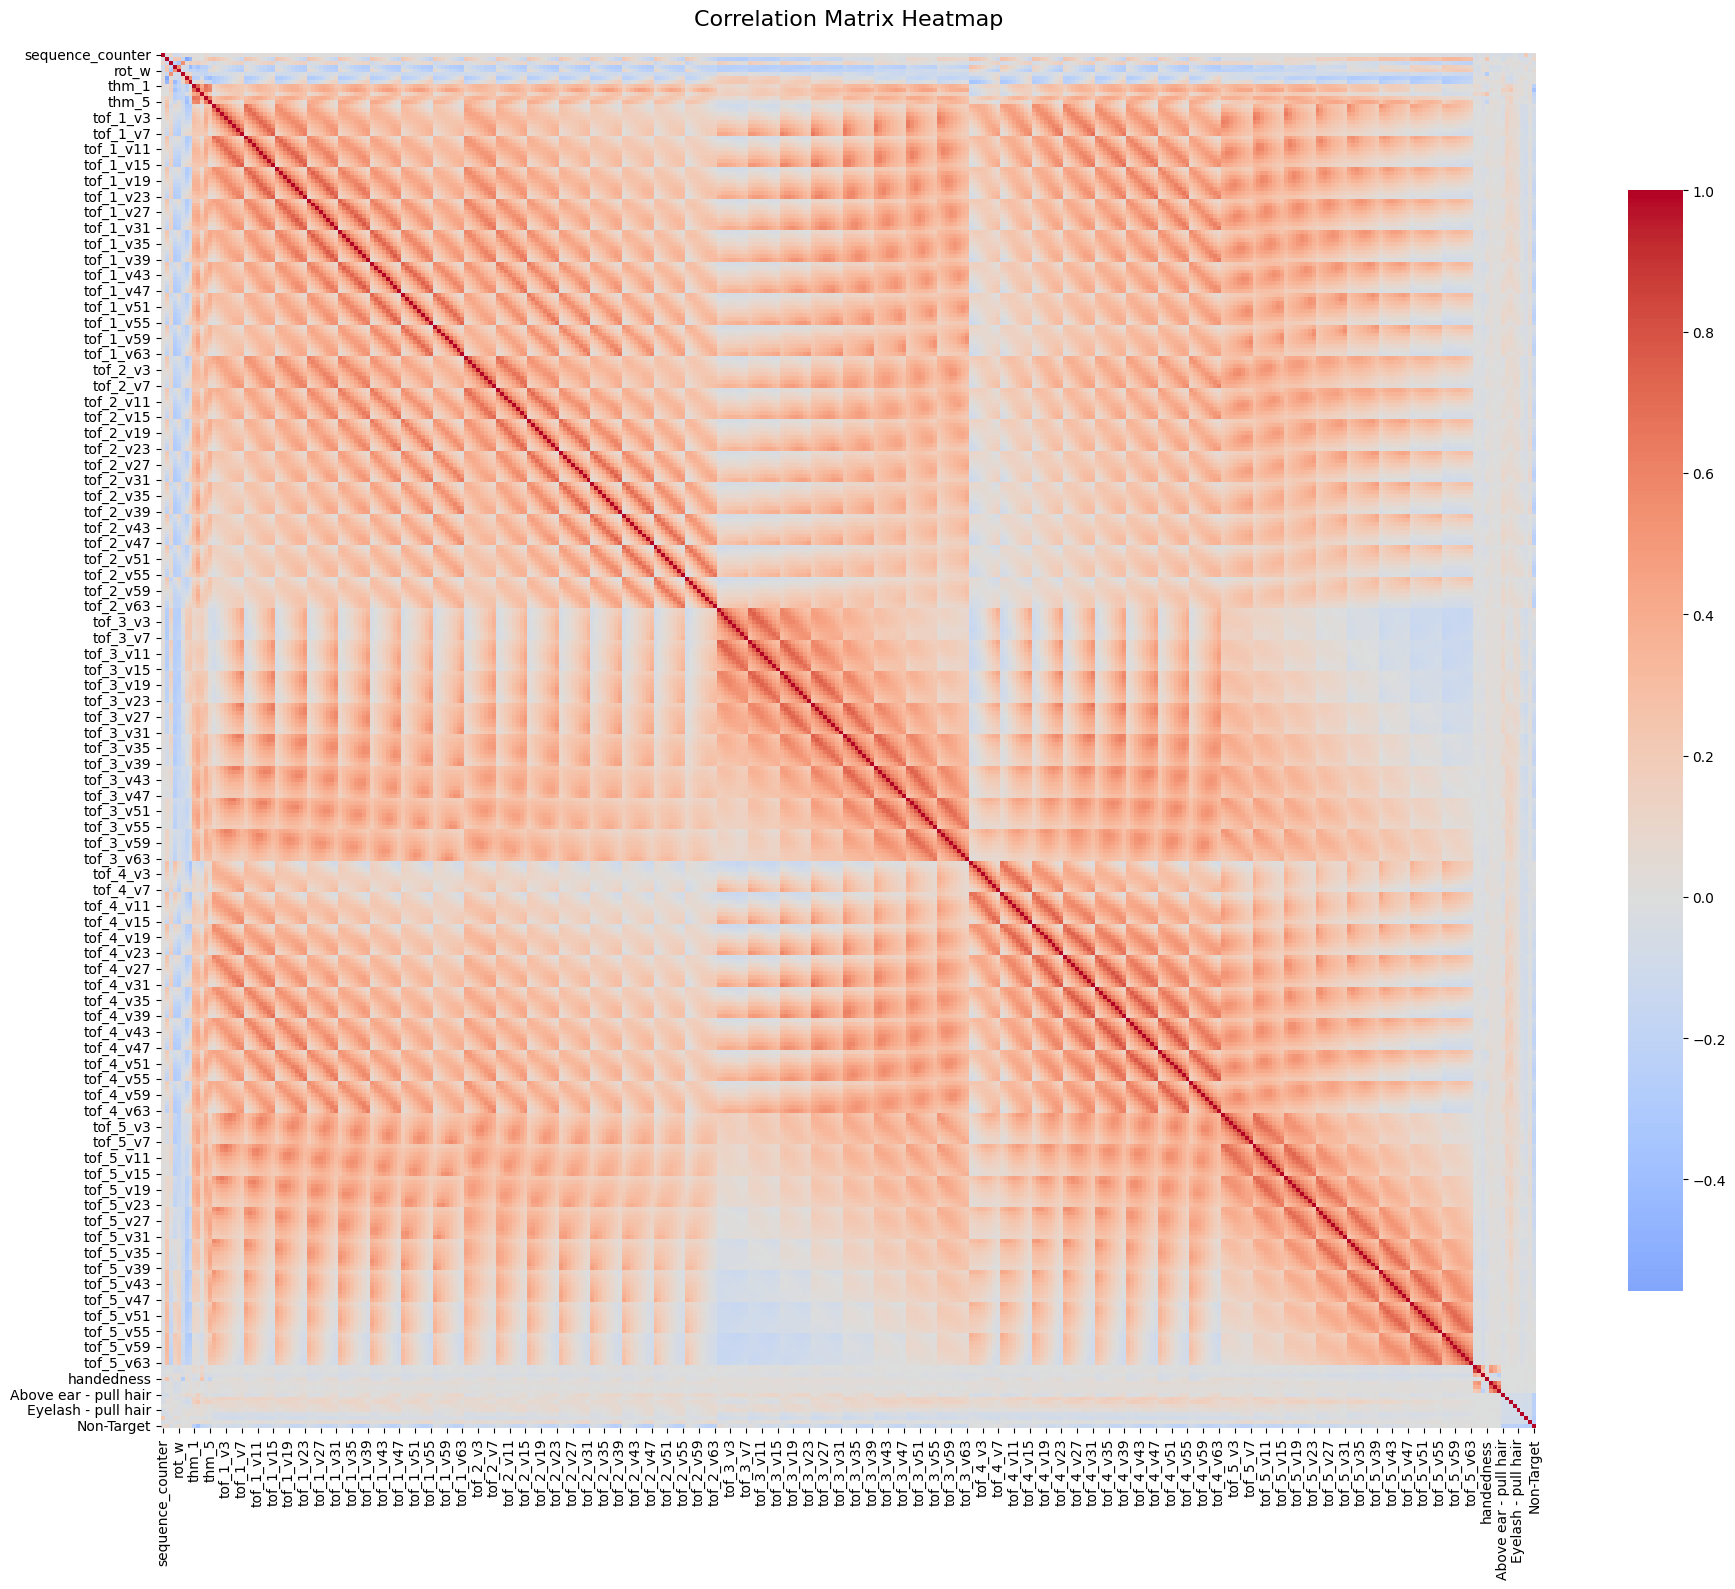

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(20, 16))

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=False,  # Set to True if you want to see correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            square=True,  # Make cells square
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

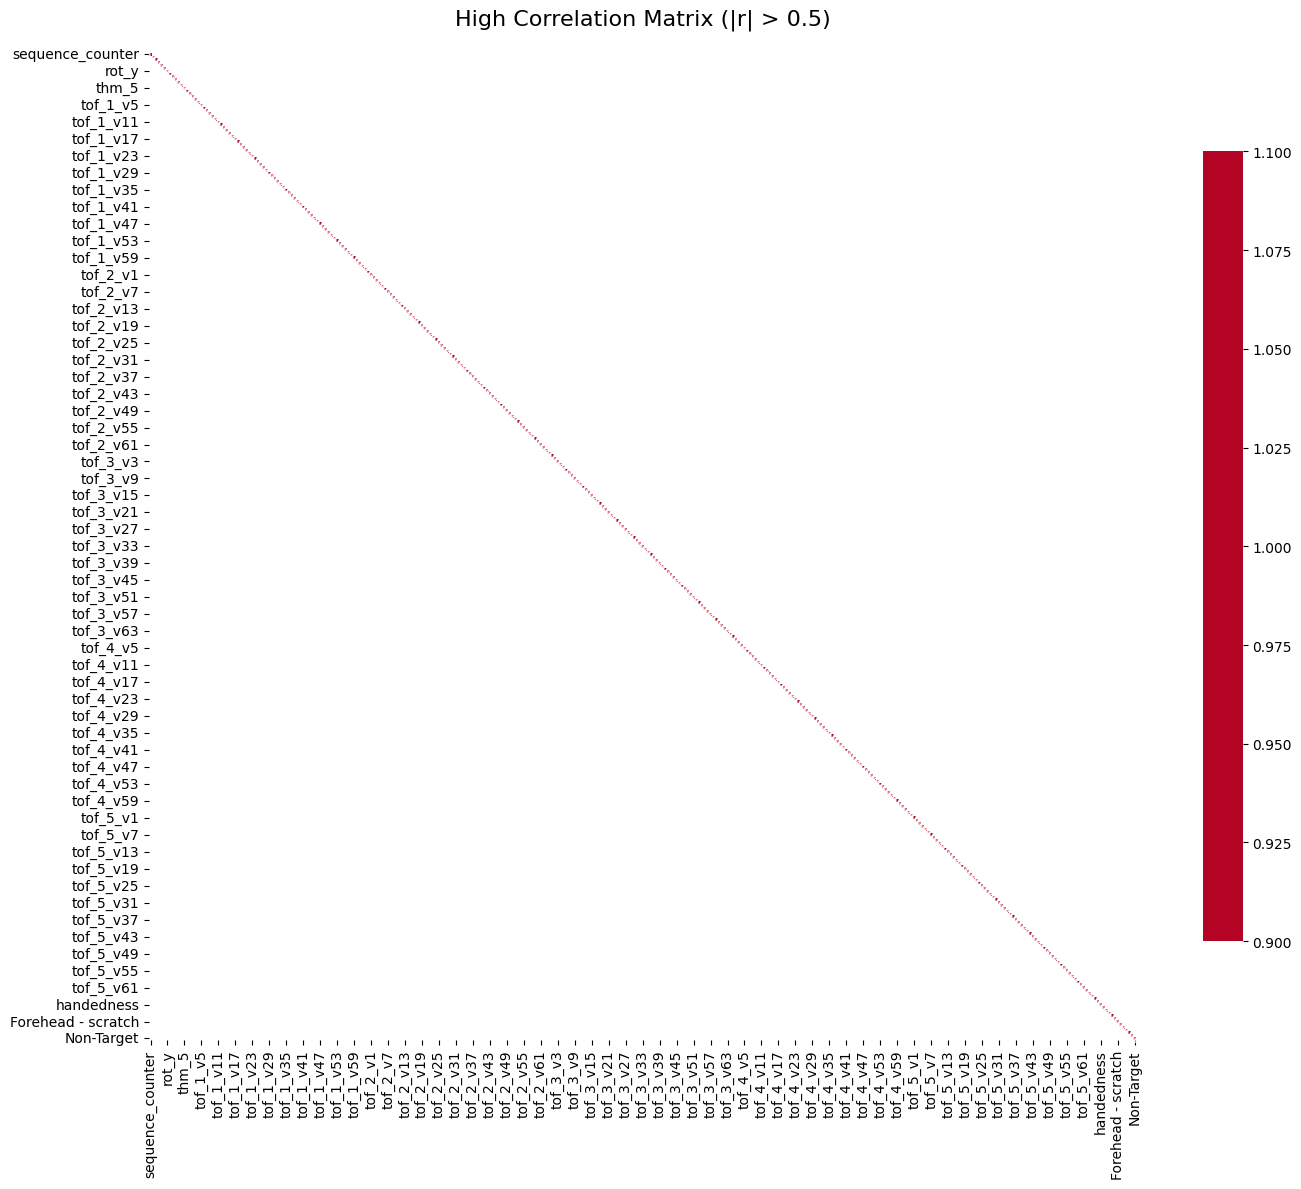

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter for high correlations (absolute value > 0.5)
high_corr = corr_matrix[abs(corr_matrix) > 0.9]

plt.figure(figsize=(15, 12))

sns.heatmap(high_corr, 
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8})

plt.title('High Correlation Matrix (|r| > 0.5)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [17]:
df_full_sensor_label_names =['sequence_id',
 'Above ear - pull hair',
 'Forehead - pull hairline',
 'Forehead - scratch',
 'Eyebrow - pull hair',
 'Eyelash - pull hair',
 'Neck - pinch skin',
 'Neck - scratch',
 'Cheek - pinch skin',
 'Non-Target']
df_full_sensor_target = df_merged_train[df_full_sensor_label_names]
df_full_sensor_target

,sequence_id,Above ear - pull hair,Forehead - pull hairline,Forehead - scratch,Eyebrow - pull hair,Eyelash - pull hair,Neck - pinch skin,Neck - scratch,Cheek - pinch skin,Non-Target
0,SEQ_000007,0,0,0,0,0,0,0,1,0
1,SEQ_000007,0,0,0,0,0,0,0,1,0
2,SEQ_000007,0,0,0,0,0,0,0,1,0
3,SEQ_000007,0,0,0,0,0,0,0,1,0
4,SEQ_000007,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531,0,0,0,0,0,0,0,0,1
574941,SEQ_065531,0,0,0,0,0,0,0,0,1
574942,SEQ_065531,0,0,0,0,0,0,0,0,1
574943,SEQ_065531,0,0,0,0,0,0,0,0,1


In [18]:
df_merged_train.drop([ 'Above ear - pull hair',
 'Forehead - pull hairline',
 'Forehead - scratch',
 'Eyebrow - pull hair',
 'Eyelash - pull hair',
 'Neck - pinch skin',
 'Neck - scratch',
 'Cheek - pinch skin',
 'Non-Target'], axis=1, inplace=True)

In [19]:
df_merged_train.columns.to_list()

['sequence_id',
 'sequence_counter',
 'acc_x',
 'acc_y',
 'acc_z',
 'rot_w',
 'rot_x',
 'rot_y',
 'rot_z',
 'thm_1',
 'thm_2',
 'thm_3',
 'thm_4',
 'thm_5',
 'tof_1_v0',
 'tof_1_v1',
 'tof_1_v2',
 'tof_1_v3',
 'tof_1_v4',
 'tof_1_v5',
 'tof_1_v6',
 'tof_1_v7',
 'tof_1_v8',
 'tof_1_v9',
 'tof_1_v10',
 'tof_1_v11',
 'tof_1_v12',
 'tof_1_v13',
 'tof_1_v14',
 'tof_1_v15',
 'tof_1_v16',
 'tof_1_v17',
 'tof_1_v18',
 'tof_1_v19',
 'tof_1_v20',
 'tof_1_v21',
 'tof_1_v22',
 'tof_1_v23',
 'tof_1_v24',
 'tof_1_v25',
 'tof_1_v26',
 'tof_1_v27',
 'tof_1_v28',
 'tof_1_v29',
 'tof_1_v30',
 'tof_1_v31',
 'tof_1_v32',
 'tof_1_v33',
 'tof_1_v34',
 'tof_1_v35',
 'tof_1_v36',
 'tof_1_v37',
 'tof_1_v38',
 'tof_1_v39',
 'tof_1_v40',
 'tof_1_v41',
 'tof_1_v42',
 'tof_1_v43',
 'tof_1_v44',
 'tof_1_v45',
 'tof_1_v46',
 'tof_1_v47',
 'tof_1_v48',
 'tof_1_v49',
 'tof_1_v50',
 'tof_1_v51',
 'tof_1_v52',
 'tof_1_v53',
 'tof_1_v54',
 'tof_1_v55',
 'tof_1_v56',
 'tof_1_v57',
 'tof_1_v58',
 'tof_1_v59',
 'tof_1_v60',

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Separate numeric vs non-numeric
df_numeric = df_merged_train.select_dtypes(include=[np.number])
df_non_numeric = df_merged_train.select_dtypes(exclude=[np.number])  # like IDs, categories

# Scale numeric part
scaler = StandardScaler()
df_scaled_numeric = scaler.fit_transform(df_numeric)

# Back to dataframe
df_scaled_numeric = pd.DataFrame(df_scaled_numeric, 
                                 columns=df_numeric.columns, 
                                 index=df_numeric.index)

# Concatenate back (non-numeric untouched)
df_final = pd.concat([df_non_numeric, df_scaled_numeric], axis=1)


NameError: name 'df_merged_train' is not defined

In [21]:
df_merged_train.describe()

,sequence_counter,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,...,tof_5_v61,tof_5_v62,tof_5_v63,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
count,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,...,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000
mean,43.645234,1.639980,1.790704,-0.459811,0.360271,-0.119899,-0.060106,-0.188147,27.077655,27.130502,...,31.936506,29.155075,27.400090,0.504544,21.630276,0.600247,0.875898,167.647967,51.502566,25.418165
std,45.717673,5.781259,5.003945,6.096490,0.225486,0.465005,0.542345,0.503484,3.220003,2.931869,...,59.898065,56.773746,55.016799,0.499980,10.343351,0.489848,0.329699,10.740996,4.900248,2.964853
min,0.000000,-34.585938,-24.402344,-42.855469,0.000000,-0.999146,-0.999695,-0.998169,-0.370413,21.958820,...,-1.000000,-1.000000,-1.000000,0.000000,10.000000,0.000000,0.000000,135.000000,41.000000,18.000000
25%,17.000000,-2.964844,-2.121094,-5.417969,0.180420,-0.455994,-0.510986,-0.626465,24.764587,24.551666,...,-1.000000,-1.000000,-1.000000,0.000000,13.000000,0.000000,1.000000,163.000000,49.000000,24.000000
50%,35.000000,2.972656,0.695312,-1.562500,0.340210,-0.186523,-0.112854,-0.263611,26.981247,26.362631,...,-1.000000,-1.000000,-1.000000,1.000000,20.000000,1.000000,1.000000,170.000000,52.000000,25.000000
75%,54.000000,6.343750,6.816406,5.164062,0.503052,0.203979,0.438416,0.249756,29.417263,29.598019,...,43.000000,36.352113,32.000000,1.000000,27.000000,1.000000,1.000000,174.000000,55.000000,27.000000
max,699.000000,46.328125,27.183594,30.078125,0.999390,0.999817,0.999451,0.999878,38.457664,37.578339,...,249.000000,249.000000,249.000000,1.000000,53.000000,1.000000,1.000000,190.500000,71.000000,44.000000


In [23]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
# Convert to numpy array for better performance with large datasets
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_merged_train),
    columns=df_merged_train.columns,
    index=df_merged_train.index
)

print("Standardization completed!")
print(f"Shape: {df_scaled.shape}")
print(f"Mean of first column: {df_scaled.iloc[:, 0].mean():.6f}")
print(f"Std of first column: {df_scaled.iloc[:, 0].std():.6f}")

ValueError: could not convert string to float: 'SEQ_000007'

In [ ]:
df_merged_train.columns.to_list()

['row_id',
 'sequence_type',
 'sequence_id',
 'sequence_counter',
 'subject',
 'orientation',
 'behavior',
 'phase',
 'gesture',
 'acc_x',
 'acc_y',
 'acc_z',
 'rot_w',
 'rot_x',
 'rot_y',
 'rot_z',
 'thm_1',
 'thm_2',
 'thm_3',
 'thm_4',
 'thm_5',
 'tof_1_v0',
 'tof_1_v1',
 'tof_1_v2',
 'tof_1_v3',
 'tof_1_v4',
 'tof_1_v5',
 'tof_1_v6',
 'tof_1_v7',
 'tof_1_v8',
 'tof_1_v9',
 'tof_1_v10',
 'tof_1_v11',
 'tof_1_v12',
 'tof_1_v13',
 'tof_1_v14',
 'tof_1_v15',
 'tof_1_v16',
 'tof_1_v17',
 'tof_1_v18',
 'tof_1_v19',
 'tof_1_v20',
 'tof_1_v21',
 'tof_1_v22',
 'tof_1_v23',
 'tof_1_v24',
 'tof_1_v25',
 'tof_1_v26',
 'tof_1_v27',
 'tof_1_v28',
 'tof_1_v29',
 'tof_1_v30',
 'tof_1_v31',
 'tof_1_v32',
 'tof_1_v33',
 'tof_1_v34',
 'tof_1_v35',
 'tof_1_v36',
 'tof_1_v37',
 'tof_1_v38',
 'tof_1_v39',
 'tof_1_v40',
 'tof_1_v41',
 'tof_1_v42',
 'tof_1_v43',
 'tof_1_v44',
 'tof_1_v45',
 'tof_1_v46',
 'tof_1_v47',
 'tof_1_v48',
 'tof_1_v49',
 'tof_1_v50',
 'tof_1_v51',
 'tof_1_v52',
 'tof_1_v53',
 'tof

In [ ]:
df_merged_train['gesture'].value_counts()


gesture
Text on phone                                 58462
Neck - scratch                                56619
Eyebrow - pull hair                           44305
Forehead - scratch                            40923
Forehead - pull hairline                      40802
Above ear - pull hair                         40560
Neck - pinch skin                             40507
Eyelash - pull hair                           40218
Cheek - pinch skin                            40124
Wave hello                                    34356
Write name in air                             31267
Pull air toward your face                     30743
Feel around in tray and pull out an object    17114
Glasses on/off                                13542
Drink from bottle/cup                         13093
Scratch knee/leg skin                         12328
Write name on leg                             10138
Pinch knee/leg skin                            9844
Name: count, dtype: int64

In [ ]:
BFRB = [
    'Above ear - pull hair',
    'Forehead - pull hairline',
    'Forehead - scratch',
    'Eyebrow - pull hair',
    'Eyelash - pull hair',
    'Neck - pinch skin',
    'Neck - scratch',
    'Cheek - pinch skin'
]
# total count of values in df_merged_train['gesture']
print("Value counts:\n", df_merged_train['gesture'].value_counts())

# count where gesture is in BFRB
count_in_BFRB = df_merged_train['gesture'].isin(BFRB).sum()
print("\nRows in BFRB:", count_in_BFRB)

# count where gesture is NOT in BFRB
count_not_in_BFRB = (~df_merged_train['gesture'].isin(BFRB)).sum()
print("Rows NOT in BFRB:", count_not_in_BFRB)

# sanity check: should equal total row count
print("\nTotal rows:", len(df_merged_train))
print("Check:", count_in_BFRB + count_not_in_BFRB == len(df_merged_train))



Value counts:
 gesture
Text on phone                                 58462
Neck - scratch                                56619
Eyebrow - pull hair                           44305
Forehead - scratch                            40923
Forehead - pull hairline                      40802
Above ear - pull hair                         40560
Neck - pinch skin                             40507
Eyelash - pull hair                           40218
Cheek - pinch skin                            40124
Wave hello                                    34356
Write name in air                             31267
Pull air toward your face                     30743
Feel around in tray and pull out an object    17114
Glasses on/off                                13542
Drink from bottle/cup                         13093
Scratch knee/leg skin                         12328
Write name on leg                             10138
Pinch knee/leg skin                            9844
Name: count, dtype: int64

Rows in BFRB: 

In [ ]:
for g in BFRB:
    df_merged_train[g] = (df_merged_train['gesture'] == g).astype(int)

df_merged_train.head()


,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,shoulder_to_wrist_cm,elbow_to_wrist_cm,Above ear - pull hair,Forehead - pull hairline,Forehead - scratch,Eyebrow - pull hair,Eyelash - pull hair,Neck - pinch skin,Neck - scratch,Cheek - pinch skin
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,52,24.0,0,0,0,0,0,0,0,1
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,52,24.0,0,0,0,0,0,0,0,1
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,52,24.0,0,0,0,0,0,0,0,1
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,52,24.0,0,0,0,0,0,0,0,1
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,52,24.0,0,0,0,0,0,0,0,1


In [ ]:
df_merged_train["Non-Target"] = (
    df_merged_train["sequence_type"]
    .astype(str)
    .str.strip()
    .str.title()
    .map({"Target": 0, "Non-Target": 1})
)

df_merged_train.columns.to_list()

['row_id',
 'sequence_type',
 'sequence_id',
 'sequence_counter',
 'subject',
 'orientation',
 'behavior',
 'phase',
 'gesture',
 'acc_x',
 'acc_y',
 'acc_z',
 'rot_w',
 'rot_x',
 'rot_y',
 'rot_z',
 'thm_1',
 'thm_2',
 'thm_3',
 'thm_4',
 'thm_5',
 'tof_1_v0',
 'tof_1_v1',
 'tof_1_v2',
 'tof_1_v3',
 'tof_1_v4',
 'tof_1_v5',
 'tof_1_v6',
 'tof_1_v7',
 'tof_1_v8',
 'tof_1_v9',
 'tof_1_v10',
 'tof_1_v11',
 'tof_1_v12',
 'tof_1_v13',
 'tof_1_v14',
 'tof_1_v15',
 'tof_1_v16',
 'tof_1_v17',
 'tof_1_v18',
 'tof_1_v19',
 'tof_1_v20',
 'tof_1_v21',
 'tof_1_v22',
 'tof_1_v23',
 'tof_1_v24',
 'tof_1_v25',
 'tof_1_v26',
 'tof_1_v27',
 'tof_1_v28',
 'tof_1_v29',
 'tof_1_v30',
 'tof_1_v31',
 'tof_1_v32',
 'tof_1_v33',
 'tof_1_v34',
 'tof_1_v35',
 'tof_1_v36',
 'tof_1_v37',
 'tof_1_v38',
 'tof_1_v39',
 'tof_1_v40',
 'tof_1_v41',
 'tof_1_v42',
 'tof_1_v43',
 'tof_1_v44',
 'tof_1_v45',
 'tof_1_v46',
 'tof_1_v47',
 'tof_1_v48',
 'tof_1_v49',
 'tof_1_v50',
 'tof_1_v51',
 'tof_1_v52',
 'tof_1_v53',
 'tof

In [ ]:
df_merged_train[df_merged_train['sequence_type']=='Non-Target']

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,elbow_to_wrist_cm,Above ear - pull hair,Forehead - pull hairline,Forehead - scratch,Eyebrow - pull hair,Eyelash - pull hair,Neck - pinch skin,Neck - scratch,Cheek - pinch skin,Non-Target
178,SEQ_000016_000000,Non-Target,SEQ_000016,0,SUBJ_052342,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Write name on leg,6.621094,...,26.0,0,0,0,0,0,0,0,0,1
179,SEQ_000016_000001,Non-Target,SEQ_000016,1,SUBJ_052342,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Write name on leg,5.964844,...,26.0,0,0,0,0,0,0,0,0,1
180,SEQ_000016_000002,Non-Target,SEQ_000016,2,SUBJ_052342,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Write name on leg,5.929688,...,26.0,0,0,0,0,0,0,0,0,1
181,SEQ_000016_000003,Non-Target,SEQ_000016,3,SUBJ_052342,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Write name on leg,6.003906,...,26.0,0,0,0,0,0,0,0,0,1
182,SEQ_000016_000004,Non-Target,SEQ_000016,4,SUBJ_052342,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Write name on leg,6.769531,...,26.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,30.0,0,0,0,0,0,0,0,0,1
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,30.0,0,0,0,0,0,0,0,0,1
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,30.0,0,0,0,0,0,0,0,0,1
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,30.0,0,0,0,0,0,0,0,0,1


In [ ]:
df_merged_train.drop([
 'sequence_type', 
 'gesture',
 'row_id',   
 'subject',
 'orientation',
 'behavior',
 'phase'], axis=1, inplace=True)

 
df_merged_train.head()

,sequence_id,sequence_counter,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,...,elbow_to_wrist_cm,Above ear - pull hair,Forehead - pull hairline,Forehead - scratch,Eyebrow - pull hair,Eyelash - pull hair,Neck - pinch skin,Neck - scratch,Cheek - pinch skin,Non-Target
0,SEQ_000007,0,6.683594,6.214844,3.355469,0.134399,-0.355164,-0.447327,-0.809753,28.943842,...,24.0,0,0,0,0,0,0,0,1,0
1,SEQ_000007,1,6.949219,6.214844,3.125000,0.143494,-0.340271,-0.428650,-0.824524,29.340816,...,24.0,0,0,0,0,0,0,0,1,0
2,SEQ_000007,2,5.722656,5.410156,5.421875,0.219055,-0.274231,-0.356934,-0.865662,30.339359,...,24.0,0,0,0,0,0,0,0,1,0
3,SEQ_000007,3,6.601562,3.531250,6.457031,0.297546,-0.264160,-0.238159,-0.885986,30.543730,...,24.0,0,0,0,0,0,0,0,1,0
4,SEQ_000007,4,5.566406,0.277344,9.632812,0.333557,-0.218628,-0.063538,-0.914856,29.317265,...,24.0,0,0,0,0,0,0,0,1,0


In [ ]:
nan_columns_X = df_merged_train.columns[df_merged_train.isnull().any()].tolist()
print("Columns in X with NaNs:\n", nan_columns_X)
df_merged_train = df_merged_train.interpolate(method="linear", axis=0)
nan_columns_X = df_merged_train.columns[df_merged_train.isnull().any()].tolist()
print("Columns in X with NaNs:\n", nan_columns_X)

Columns in X with NaNs:
 ['rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5', 'tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9', 'tof_1_v10', 'tof_1_v11', 'tof_1_v12', 'tof_1_v13', 'tof_1_v14', 'tof_1_v15', 'tof_1_v16', 'tof_1_v17', 'tof_1_v18', 'tof_1_v19', 'tof_1_v20', 'tof_1_v21', 'tof_1_v22', 'tof_1_v23', 'tof_1_v24', 'tof_1_v25', 'tof_1_v26', 'tof_1_v27', 'tof_1_v28', 'tof_1_v29', 'tof_1_v30', 'tof_1_v31', 'tof_1_v32', 'tof_1_v33', 'tof_1_v34', 'tof_1_v35', 'tof_1_v36', 'tof_1_v37', 'tof_1_v38', 'tof_1_v39', 'tof_1_v40', 'tof_1_v41', 'tof_1_v42', 'tof_1_v43', 'tof_1_v44', 'tof_1_v45', 'tof_1_v46', 'tof_1_v47', 'tof_1_v48', 'tof_1_v49', 'tof_1_v50', 'tof_1_v51', 'tof_1_v52', 'tof_1_v53', 'tof_1_v54', 'tof_1_v55', 'tof_1_v56', 'tof_1_v57', 'tof_1_v58', 'tof_1_v59', 'tof_1_v60', 'tof_1_v61', 'tof_1_v62', 'tof_1_v63', 'tof_2_v0', 'tof_2_v1', 'tof_2_v2', 'tof_2_v3', 'tof_2_v4', 'tof_2_v5',

/tmp/ipykernel_7715/3225166514.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_merged_train = df_merged_train.interpolate(method="linear", axis=0)


Columns in X with NaNs:
 []


In [ ]:
non_numeric_cols = df_merged_train.select_dtypes(exclude='number').columns
print("Non-numeric columns:", non_numeric_cols)
corr_matrix = df_merged_train.corr(numeric_only=True)


Non-numeric columns: Index(['sequence_id'], dtype='object')


In [ ]:
corr_matrix

,sequence_counter,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,...,elbow_to_wrist_cm,Above ear - pull hair,Forehead - pull hairline,Forehead - scratch,Eyebrow - pull hair,Eyelash - pull hair,Neck - pinch skin,Neck - scratch,Cheek - pinch skin,Non-Target
sequence_counter,1.000000,-0.024269,0.103981,-0.111459,-0.083034,0.017287,0.012457,0.029921,0.020314,0.026548,...,-0.037050,-0.056442,-0.056498,-0.052491,0.001483,-0.059375,-0.053637,0.219803,-0.050193,0.037183
acc_x,-0.024269,1.000000,-0.126223,0.236679,0.222634,-0.161042,-0.557104,-0.441409,0.035409,-0.012744,...,-0.008609,-0.091386,0.006568,0.030461,-0.001824,-0.021003,-0.070292,-0.029254,-0.021952,0.106124
acc_y,0.103981,-0.126223,1.000000,-0.209915,-0.330681,0.554093,0.041625,0.180244,0.120257,0.169497,...,0.001520,0.009113,0.030271,0.024934,0.011229,0.040191,0.006474,-0.041162,0.037474,-0.058551
acc_z,-0.111459,0.236679,-0.209915,1.000000,0.538809,-0.056117,-0.085015,-0.425449,-0.260169,-0.350630,...,-0.076138,-0.018534,-0.017405,-0.006477,0.017798,-0.012539,-0.016464,0.057699,-0.023147,0.004592
rot_w,-0.083034,0.222634,-0.330681,0.538809,1.000000,-0.068316,-0.118578,-0.208201,-0.181265,-0.225060,...,-0.063696,0.002695,-0.028146,-0.006020,-0.018734,-0.022429,-0.015773,0.034418,-0.040310,0.046619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eyelash - pull hair,-0.059375,-0.021003,0.040191,-0.012539,-0.022429,0.009764,0.005718,0.024539,0.021115,0.034340,...,0.005629,-0.075555,-0.075798,-0.075919,-0.079245,1.000000,-0.075502,-0.090641,-0.075118,-0.224661
Neck - pinch skin,-0.053637,-0.070292,0.006474,-0.016464,-0.015773,0.007229,0.050686,0.037442,0.022881,0.042277,...,0.003194,-0.075847,-0.076090,-0.076212,-0.079550,-0.075502,1.000000,-0.090990,-0.075407,-0.225528
Neck - scratch,0.219803,-0.029254,-0.041162,0.057699,0.034418,-0.005997,0.020369,-0.024114,-0.021750,-0.016933,...,-0.015536,-0.091055,-0.091346,-0.091492,-0.095501,-0.090641,-0.090990,1.000000,-0.090527,-0.270747
Cheek - pinch skin,-0.050193,-0.021952,0.037474,-0.023147,-0.040310,-0.008450,-0.004297,0.011149,0.044823,0.039575,...,0.002306,-0.075461,-0.075702,-0.075823,-0.079145,-0.075118,-0.075407,-0.090527,1.000000,-0.224379


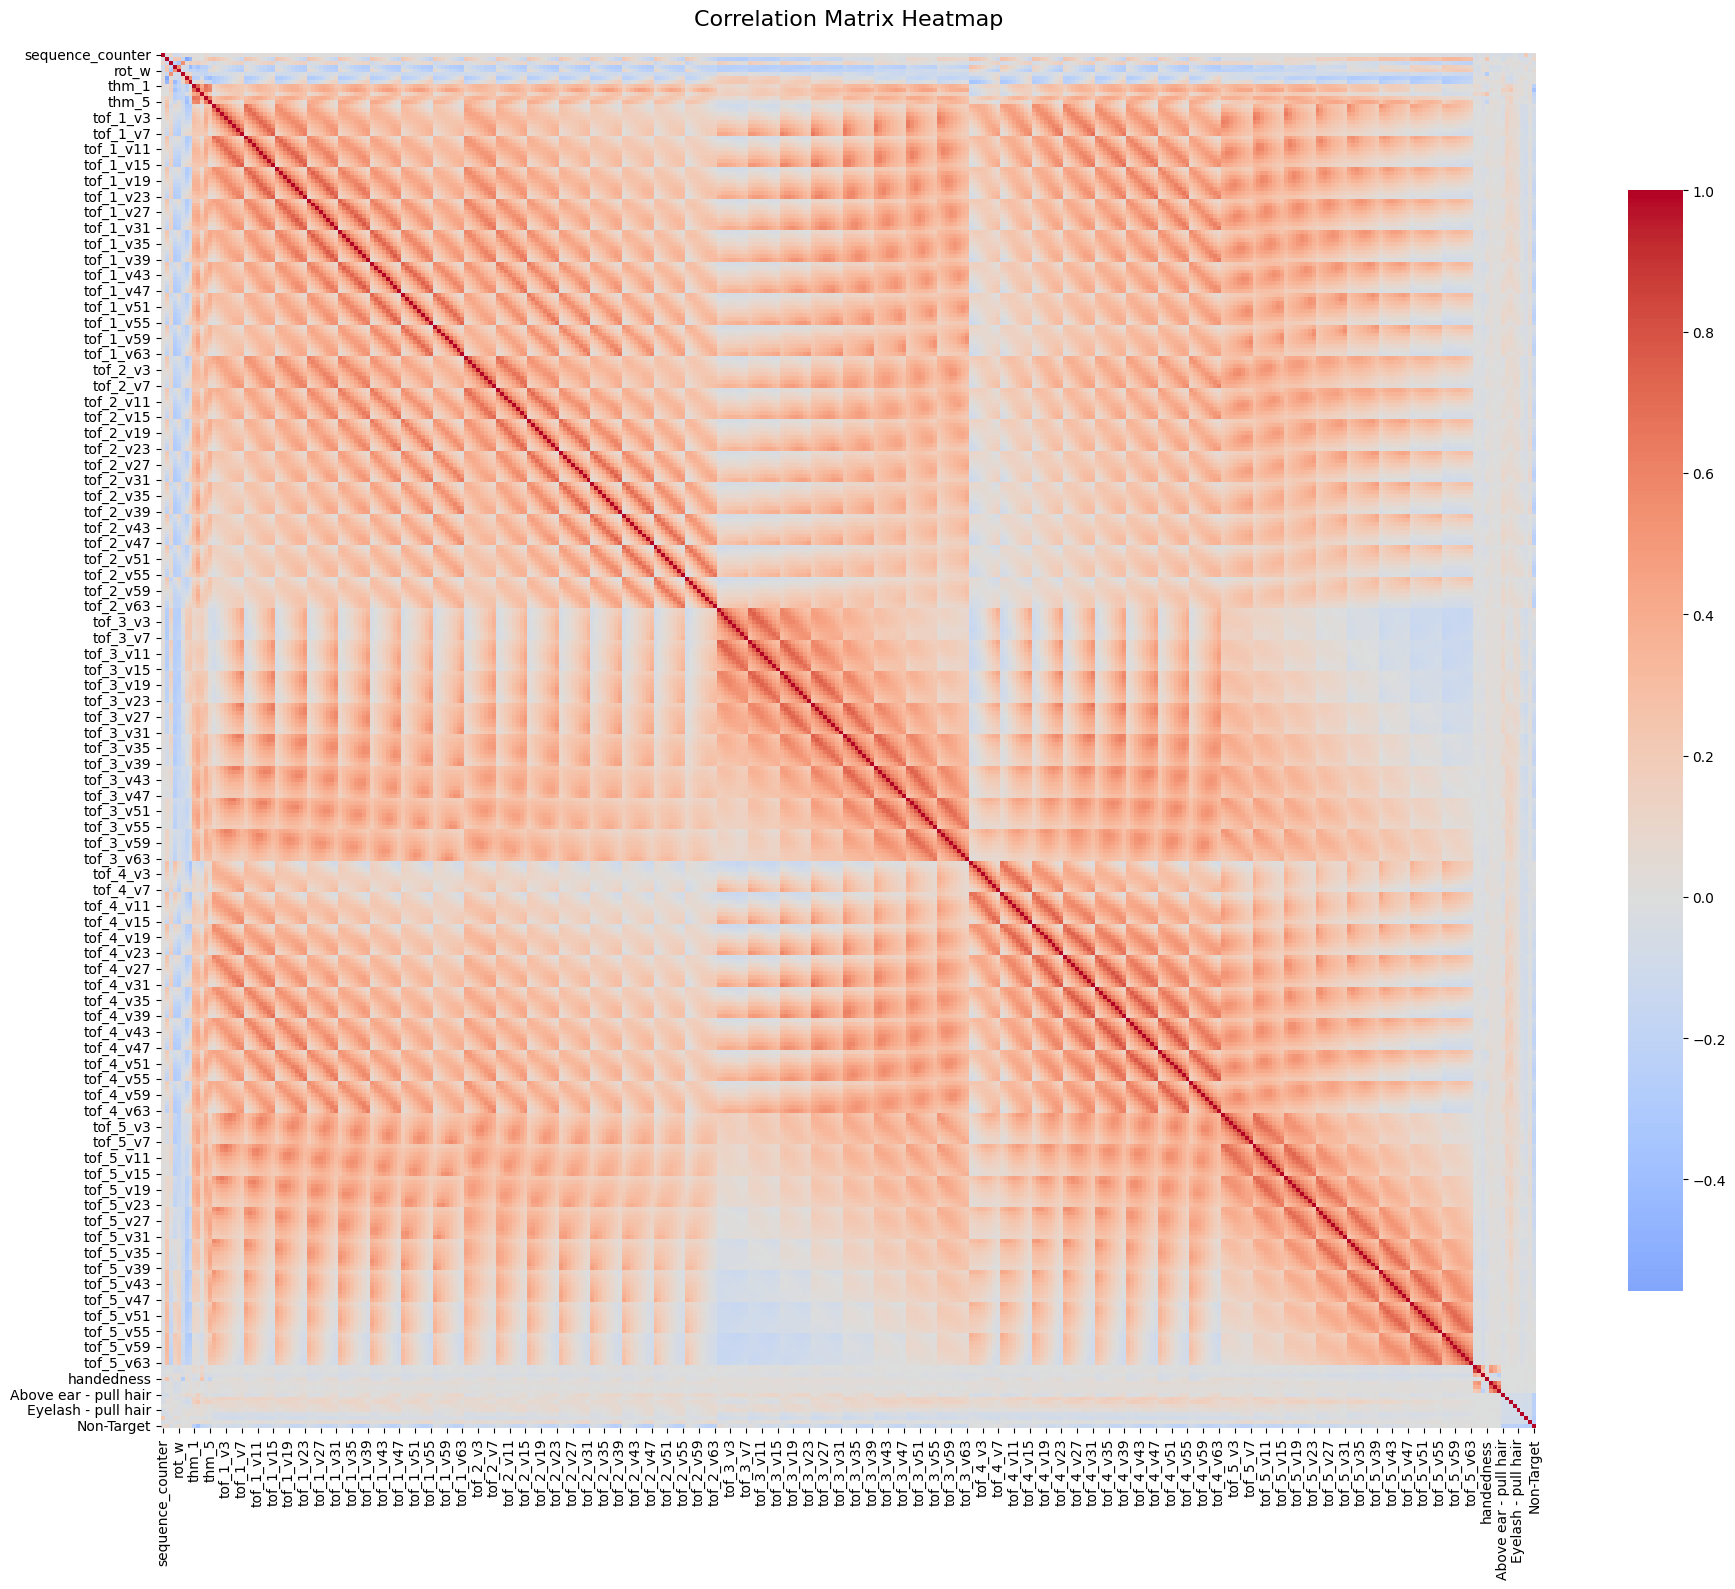

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(20, 16))

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=False,  # Set to True if you want to see correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            square=True,  # Make cells square
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

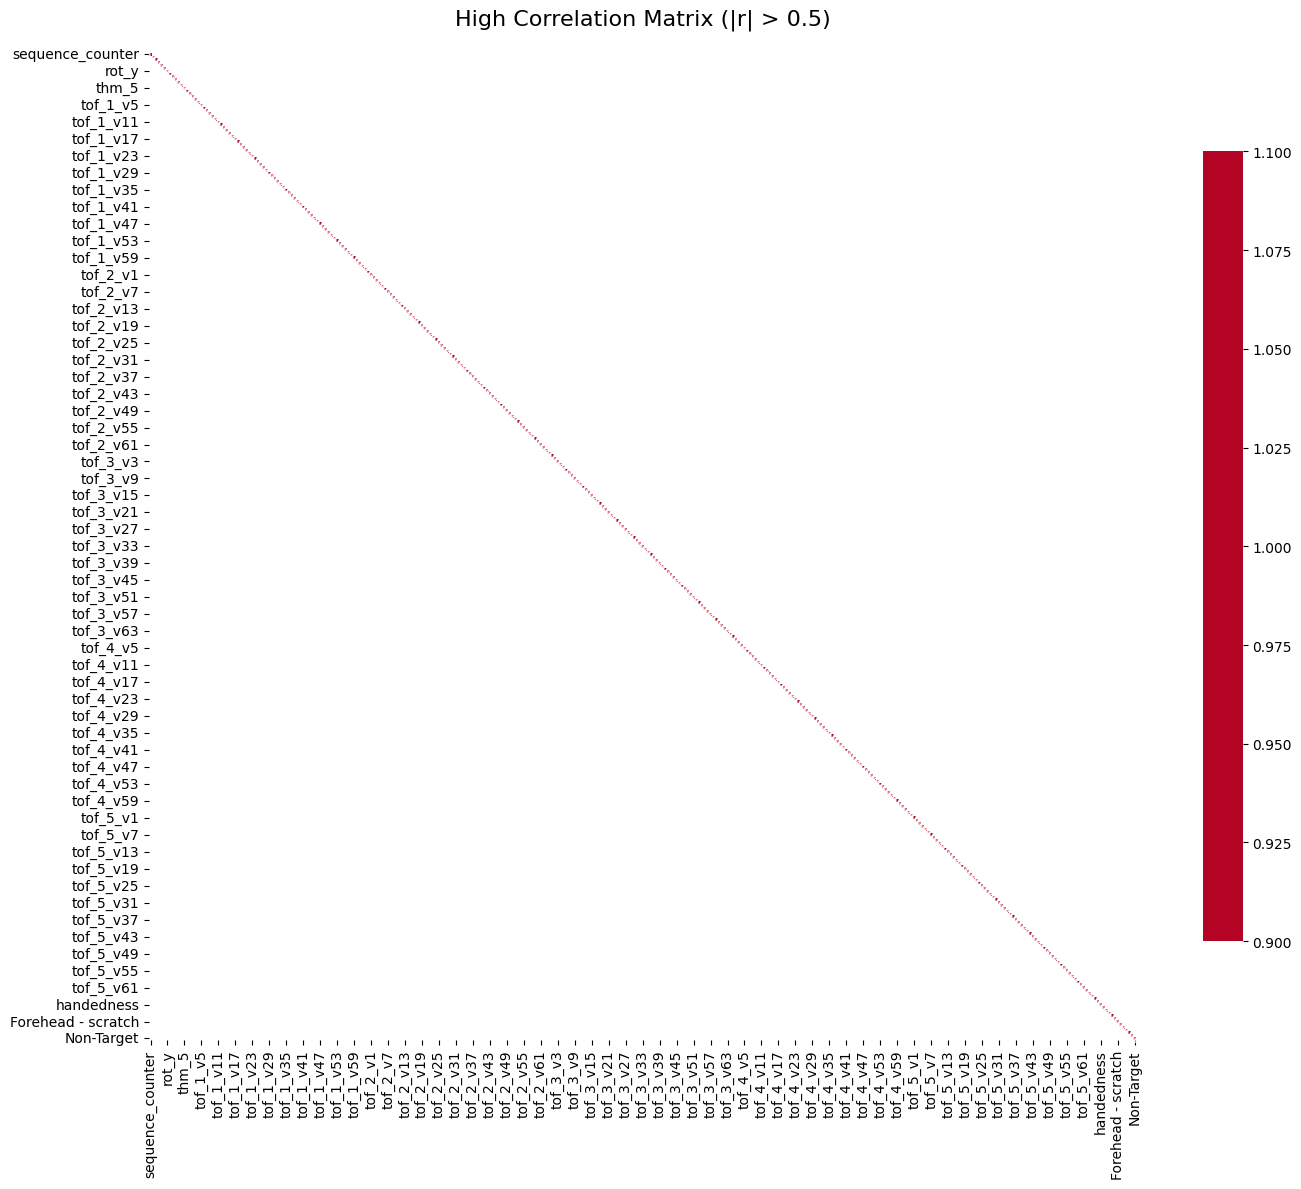

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter for high correlations (absolute value > 0.5)
high_corr = corr_matrix[abs(corr_matrix) > 0.9]

plt.figure(figsize=(15, 12))

sns.heatmap(high_corr, 
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8})

plt.title('High Correlation Matrix (|r| > 0.5)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
df_full_sensor_label_names =['sequence_id',
 'Above ear - pull hair',
 'Forehead - pull hairline',
 'Forehead - scratch',
 'Eyebrow - pull hair',
 'Eyelash - pull hair',
 'Neck - pinch skin',
 'Neck - scratch',
 'Cheek - pinch skin',
 'Non-Target']
df_full_sensor_target = df_merged_train[df_full_sensor_label_names]
df_full_sensor_target

,sequence_id,Above ear - pull hair,Forehead - pull hairline,Forehead - scratch,Eyebrow - pull hair,Eyelash - pull hair,Neck - pinch skin,Neck - scratch,Cheek - pinch skin,Non-Target
0,SEQ_000007,0,0,0,0,0,0,0,1,0
1,SEQ_000007,0,0,0,0,0,0,0,1,0
2,SEQ_000007,0,0,0,0,0,0,0,1,0
3,SEQ_000007,0,0,0,0,0,0,0,1,0
4,SEQ_000007,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531,0,0,0,0,0,0,0,0,1
574941,SEQ_065531,0,0,0,0,0,0,0,0,1
574942,SEQ_065531,0,0,0,0,0,0,0,0,1
574943,SEQ_065531,0,0,0,0,0,0,0,0,1


In [ ]:
df_merged_train.drop([ 'Above ear - pull hair',
 'Forehead - pull hairline',
 'Forehead - scratch',
 'Eyebrow - pull hair',
 'Eyelash - pull hair',
 'Neck - pinch skin',
 'Neck - scratch',
 'Cheek - pinch skin',
 'Non-Target'], axis=1, inplace=True)

In [ ]:
df_merged_train.columns.to_list()

['sequence_id',
 'sequence_counter',
 'acc_x',
 'acc_y',
 'acc_z',
 'rot_w',
 'rot_x',
 'rot_y',
 'rot_z',
 'thm_1',
 'thm_2',
 'thm_3',
 'thm_4',
 'thm_5',
 'tof_1_v0',
 'tof_1_v1',
 'tof_1_v2',
 'tof_1_v3',
 'tof_1_v4',
 'tof_1_v5',
 'tof_1_v6',
 'tof_1_v7',
 'tof_1_v8',
 'tof_1_v9',
 'tof_1_v10',
 'tof_1_v11',
 'tof_1_v12',
 'tof_1_v13',
 'tof_1_v14',
 'tof_1_v15',
 'tof_1_v16',
 'tof_1_v17',
 'tof_1_v18',
 'tof_1_v19',
 'tof_1_v20',
 'tof_1_v21',
 'tof_1_v22',
 'tof_1_v23',
 'tof_1_v24',
 'tof_1_v25',
 'tof_1_v26',
 'tof_1_v27',
 'tof_1_v28',
 'tof_1_v29',
 'tof_1_v30',
 'tof_1_v31',
 'tof_1_v32',
 'tof_1_v33',
 'tof_1_v34',
 'tof_1_v35',
 'tof_1_v36',
 'tof_1_v37',
 'tof_1_v38',
 'tof_1_v39',
 'tof_1_v40',
 'tof_1_v41',
 'tof_1_v42',
 'tof_1_v43',
 'tof_1_v44',
 'tof_1_v45',
 'tof_1_v46',
 'tof_1_v47',
 'tof_1_v48',
 'tof_1_v49',
 'tof_1_v50',
 'tof_1_v51',
 'tof_1_v52',
 'tof_1_v53',
 'tof_1_v54',
 'tof_1_v55',
 'tof_1_v56',
 'tof_1_v57',
 'tof_1_v58',
 'tof_1_v59',
 'tof_1_v60',

In [ ]:
df_merged_train.describe()

,sequence_counter,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,...,tof_5_v61,tof_5_v62,tof_5_v63,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
count,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,...,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000
mean,43.645234,1.639980,1.790704,-0.459811,0.360271,-0.119899,-0.060106,-0.188147,27.077655,27.130502,...,31.936506,29.155075,27.400090,0.504544,21.630276,0.600247,0.875898,167.647967,51.502566,25.418165
std,45.717673,5.781259,5.003945,6.096490,0.225486,0.465005,0.542345,0.503484,3.220003,2.931869,...,59.898065,56.773746,55.016799,0.499980,10.343351,0.489848,0.329699,10.740996,4.900248,2.964853
min,0.000000,-34.585938,-24.402344,-42.855469,0.000000,-0.999146,-0.999695,-0.998169,-0.370413,21.958820,...,-1.000000,-1.000000,-1.000000,0.000000,10.000000,0.000000,0.000000,135.000000,41.000000,18.000000
25%,17.000000,-2.964844,-2.121094,-5.417969,0.180420,-0.455994,-0.510986,-0.626465,24.764587,24.551666,...,-1.000000,-1.000000,-1.000000,0.000000,13.000000,0.000000,1.000000,163.000000,49.000000,24.000000
50%,35.000000,2.972656,0.695312,-1.562500,0.340210,-0.186523,-0.112854,-0.263611,26.981247,26.362631,...,-1.000000,-1.000000,-1.000000,1.000000,20.000000,1.000000,1.000000,170.000000,52.000000,25.000000
75%,54.000000,6.343750,6.816406,5.164062,0.503052,0.203979,0.438416,0.249756,29.417263,29.598019,...,43.000000,36.352113,32.000000,1.000000,27.000000,1.000000,1.000000,174.000000,55.000000,27.000000
max,699.000000,46.328125,27.183594,30.078125,0.999390,0.999817,0.999451,0.999878,38.457664,37.578339,...,249.000000,249.000000,249.000000,1.000000,53.000000,1.000000,1.000000,190.500000,71.000000,44.000000


In [2]:
import numpy as np
import pandas as pd

def prepare_whole_sequences(df_x, df_y, max_steps=700):
    # Drop unnecessary columns early
    df_x
    df_x = df_x.drop(columns=["sequence_counter"])  
    
    # Get number of features (exclude seq_id)
    feature_cols = [c for c in df_x.columns if c != "sequence_id"]
    n_features = len(feature_cols)
    
    # Find number of unique sequences
    sequence_ids = df_x["sequence_id"].unique()
    n_sequences = len(sequence_ids)

    # Preallocate final arrays
    X = np.zeros((n_sequences, max_steps, n_features), dtype=np.float32)
    Y = np.zeros((n_sequences, 9), dtype=np.float32)  # 9 classes, already multi-hot
    
    for i, seq_id in enumerate(sequence_ids):
        if i % 100 == 0:
            print(f"Processing {i}/{n_sequences}")

        # Extract sensor data for this sequence
        seq = df_x[df_x["sequence_id"] == seq_id][feature_cols].values.astype(np.float32)
        
        # Truncate if longer than max_steps
        seq = seq[:max_steps]
        
        # Fill into preallocated array
        X[i, :len(seq), :] = seq
        
        # Extract label row (drop sequence_id col, keep only class columns)
        label_row = df_y[df_y["sequence_id"] == seq_id].drop(columns=["sequence_id"]).iloc[0].values
        Y[i] = label_row
    
    return X, Y


In [3]:
x_train_fullsensor,y_train_fullsensor = prepare_whole_sequences(df_merged_train,df_full_sensor_target)
x_train_fullsensor.shape,x_train_fullsensor.shape

NameError: name 'df_merged_train' is not defined